In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import pyvista as pv
import pandas as pd
from scipy import interpolate
import CollisionModule

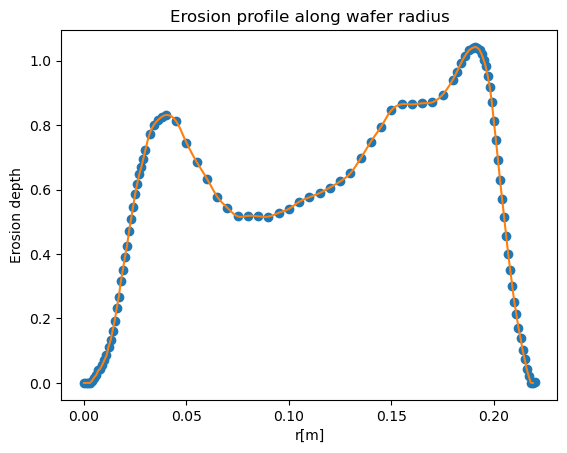

In [2]:
erosion = pd.read_excel('./erosionData.xlsx')

r = erosion['r'].to_numpy()/1000
measure = erosion['measure'].to_numpy()
minus_m = measure < 0
measure[minus_m] = 0

erosion_func = interpolate.interp1d(r, measure, kind='quadratic')

xnew = np.arange(0, 0.22, 0.001)
ynew = erosion_func(xnew)   # use interpolation function returned by `interp1d`
plt.plot(r, measure, 'o', xnew, ynew, '-')
plt.title('Erosion profile along wafer radius')
plt.xlabel('r[m]')
plt.ylabel('Erosion depth')
plt.show()

(6565275,)


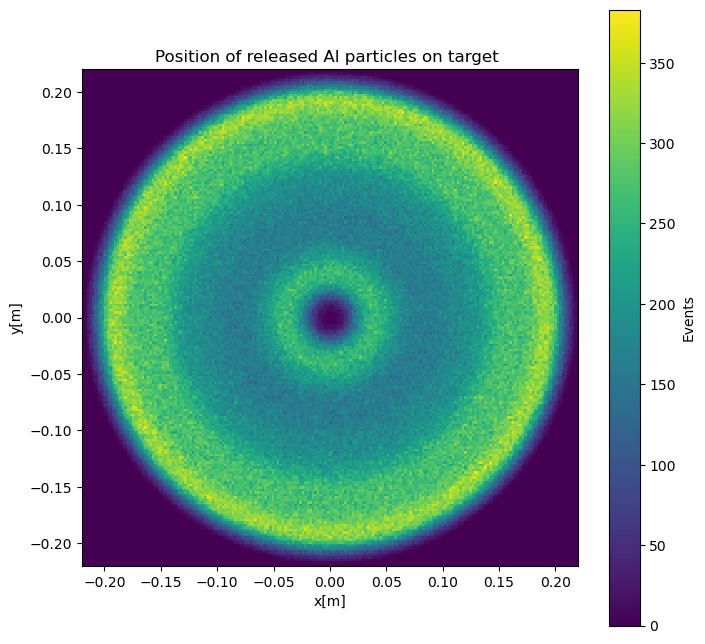

In [3]:
erosion_bins = 200
erosion_r = np.arange(0, 0.22, 0.22/erosion_bins)
erosion_r = erosion_r + 0.22/erosion_bins/2
# print(erosion_r)

erosion_event = erosion_func(erosion_r)
erosion_event_minus = erosion_event < 0
erosion_event[erosion_event_minus] = 0
for i in range(erosion_event.shape[0]):
    erosion_event[i] *= (0.22/erosion_bins)**2 + 2*i*(0.22/erosion_bins)**2
erosion_event *= 2e8

gen_dist_x = np.array([])
gen_dist_y = np.array([])

# r = np.linspace(0, 0.22, 22)
bins = 200
r = 0.22/bins

for i in range(bins):
    # print(i)
    # print(erosion_event[0][i])
    theta = np.random.rand(int(erosion_event[i]))*2*np.pi
    # print(theta.shape)
    # print(np.multiply((np.random.rand(int(erosion_event[0][i]))*0.01 + i*0.01), np.cos(theta)).shape)
    gen_dist_x = np.concatenate((gen_dist_x, np.multiply((np.random.rand(int(erosion_event[i]))*r + i*r), np.cos(theta))))
    # print(np.array(gen_dist_x).shape)
    gen_dist_y = np.concatenate((gen_dist_y, np.multiply((np.random.rand(int(erosion_event[i]))*r + i*r), np.sin(theta))))

print(gen_dist_x.shape)

xbins = np.linspace(-0.22,0.22,200)
ybins = np.linspace(-0.22,0.22,200)
# ybins = np.linspace(1.815, 2.415, 200)
x_bins = np.histogram(gen_dist_x, bins=xbins)
y_bins = np.histogram(gen_dist_y, bins=ybins)

H, xedges, yedges = np.histogram2d(gen_dist_x, gen_dist_y, bins=(xbins, ybins))


fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(H.T, interpolation='nearest', origin='lower',
        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
ax.set_title('Position of released Al particles on target ')
ax.set_xlabel('x[m]')
ax.set_ylabel('y[m]')
fig.colorbar(im, ax=ax, label='Events')
plt.show()

In [4]:
xbins = np.linspace(-0.22,0.22,80)
ybins = np.linspace(-0.22,0.22,80)
# ybins = np.linspace(1.815, 2.415, 200)
x_bins = np.histogram(gen_dist_x, bins=xbins)
y_bins = np.histogram(gen_dist_y, bins=ybins)

H, xedges, yedges = np.histogram2d(gen_dist_x, gen_dist_y, bins=(xbins, ybins))

xbins = np.linspace(-22,22,79)
ybins = np.linspace(-22,22,79)
x, y = np.meshgrid(xbins, ybins)

grid = pv.StructuredGrid(x, y, H/200)
grid.plot()

Widget(value='<iframe src="http://localhost:52773/index.html?ui=P_0x23251fdee90_0&reconnect=auto" class="pyvis…

In [5]:
def rfunc(x, n, beta): #Release factor function
    # print("-------rfunc------")
    # print(x)
    # n = 1.6
    # beta = -0.7
    y = np.cos(x) ** n * (1 + beta * np.cos(x) ** 2)# * (n ** 2 + 4 * n + 3) / (n * beta + n + beta + 3) /2 / pi
    return y

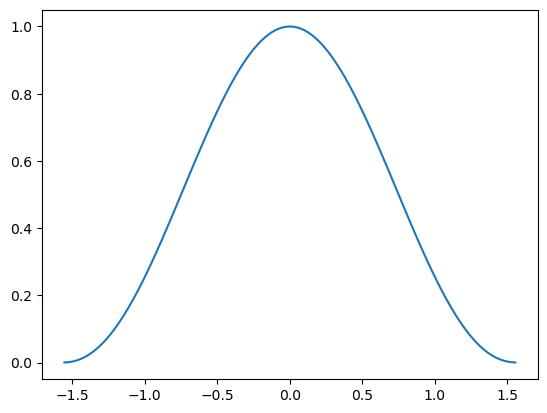

In [165]:
theta_bins_size = 100
theta_bins = np.linspace(-np.pi/2, np.pi/2, theta_bins_size)
theta_hist_x = theta_bins + np.pi/((theta_bins_size-1)*2)
theta_hist_x = theta_hist_x[:-1]

theta_hist_y = rfunc(theta_hist_x, 1.11*2, 0)

fig, ax = plt.subplots(1, 1)

ax.plot(theta_hist_x, theta_hist_y)

(array([3.00000e+01, 2.48000e+02, 7.62000e+02, 1.57100e+03, 2.73800e+03,
        4.26000e+03, 6.12700e+03, 8.32600e+03, 1.09170e+04, 1.38840e+04,
        1.71340e+04, 2.08450e+04, 2.48100e+04, 2.91290e+04, 3.37400e+04,
        3.86920e+04, 4.40020e+04, 4.93140e+04, 5.53030e+04, 6.08740e+04,
        6.70830e+04, 7.35440e+04, 7.96800e+04, 8.69060e+04, 9.29890e+04,
        9.96300e+04, 1.06726e+05, 1.13317e+05, 1.20643e+05, 1.26258e+05,
        1.33026e+05, 1.39906e+05, 1.46221e+05, 1.51971e+05, 1.57797e+05,
        1.64075e+05, 1.69203e+05, 1.74606e+05, 1.79119e+05, 1.84256e+05,
        1.87574e+05, 1.92005e+05, 1.95498e+05, 1.98896e+05, 2.00808e+05,
        2.03513e+05, 2.05214e+05, 2.06047e+05, 2.07602e+05, 2.07857e+05,
        2.08113e+05, 2.07643e+05, 2.06360e+05, 2.05340e+05, 2.03385e+05,
        2.01327e+05, 1.99203e+05, 1.95253e+05, 1.92190e+05, 1.88223e+05,
        1.83801e+05, 1.79568e+05, 1.74791e+05, 1.69423e+05, 1.63951e+05,
        1.58641e+05, 1.52379e+05, 1.46328e+05, 1.39

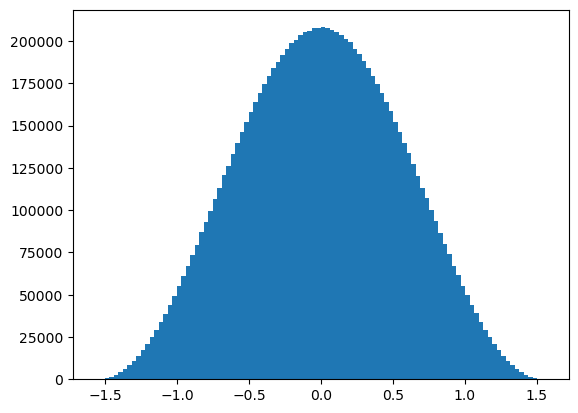

In [166]:
theta_sample = np.array([])
theta_bins = np.linspace(-np.pi/2, np.pi/2, theta_bins_size)
theta_hist_x = theta_bins + np.pi/((theta_bins_size-1)*2)
theta_hist_x = theta_hist_x[:-1]

for i in range(theta_bins.shape[0] - 1):
    theta_sample = np.concatenate(( theta_sample, np.random.uniform(theta_bins[i], theta_bins[i+1],\
                                 int(rfunc(theta_hist_x[i], 1.11*2, 0)/np.sum(rfunc(theta_hist_x, 1.11*2, 0))*1e7))))

plt.hist(theta_sample, bins=100)

(array([1.02000e+02, 1.15200e+03, 3.54300e+03, 7.42400e+03, 1.28980e+04,
        2.00590e+04, 2.88760e+04, 3.94020e+04, 5.15650e+04, 6.57840e+04,
        8.13410e+04, 9.84860e+04, 1.17924e+05, 1.38271e+05, 1.60252e+05,
        1.83822e+05, 2.08583e+05, 2.34472e+05, 2.61658e+05, 2.90033e+05,
        3.20048e+05, 3.49091e+05, 3.80223e+05, 4.10945e+05, 4.43425e+05,
        4.74626e+05, 5.06450e+05, 5.38720e+05, 5.72101e+05, 6.02188e+05,
        6.34134e+05, 6.64890e+05, 6.94741e+05, 7.23673e+05, 7.53258e+05,
        7.78953e+05, 8.05036e+05, 8.30706e+05, 8.53049e+05, 8.74973e+05,
        8.95397e+05, 9.13766e+05, 9.28928e+05, 9.44781e+05, 9.56614e+05,
        9.67985e+05, 9.76294e+05, 9.82193e+05, 9.88095e+05, 9.88973e+05,
        9.89255e+05, 9.87134e+05, 9.82047e+05, 9.76620e+05, 9.67144e+05,
        9.57578e+05, 9.43580e+05, 9.29933e+05, 9.13472e+05, 8.95098e+05,
        8.75053e+05, 8.53928e+05, 8.29587e+05, 8.05083e+05, 7.79799e+05,
        7.52966e+05, 7.24358e+05, 6.93705e+05, 6.64

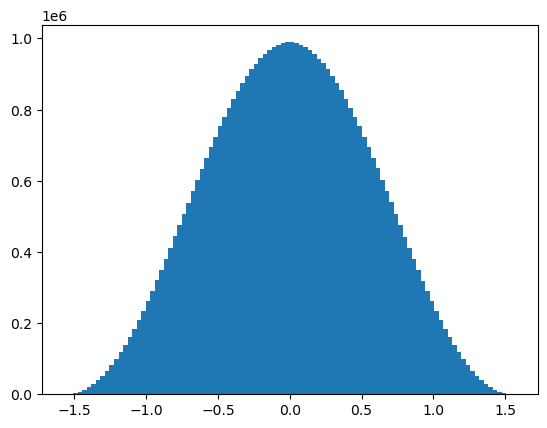

In [167]:
theta_sample = np.array([])
theta_hist_y *= 1e6
for i in range(theta_bins.shape[0] - 1):
    theta_sample = np.concatenate(( theta_sample, np.random.uniform(theta_bins[i], theta_bins[i+1], int(theta_hist_y[i]))))

plt.hist(theta_sample, bins=100)

(array([1.90000e+01, 1.95000e+02, 5.08000e+02, 1.06000e+03, 1.78900e+03,
        2.90400e+03, 4.07500e+03, 5.52200e+03, 7.21900e+03, 9.24300e+03,
        1.11640e+04, 1.36420e+04, 1.61950e+04, 1.95420e+04, 2.21250e+04,
        2.55560e+04, 2.89200e+04, 3.20860e+04, 3.64910e+04, 4.00650e+04,
        4.42950e+04, 4.85050e+04, 5.27240e+04, 5.69640e+04, 6.12730e+04,
        6.56910e+04, 6.95020e+04, 7.52440e+04, 7.88260e+04, 8.28660e+04,
        8.68330e+04, 9.14960e+04, 9.64100e+04, 9.95210e+04, 1.04113e+05,
        1.07266e+05, 1.11385e+05, 1.14725e+05, 1.17253e+05, 1.20844e+05,
        1.23951e+05, 1.25989e+05, 1.28333e+05, 1.30006e+05, 1.32211e+05,
        1.33898e+05, 1.35114e+05, 1.35436e+05, 1.36220e+05, 1.35982e+05,
        1.36262e+05, 1.35758e+05, 1.35317e+05, 1.35330e+05, 1.33784e+05,
        1.31727e+05, 1.29791e+05, 1.28738e+05, 1.26153e+05, 1.23557e+05,
        1.20984e+05, 1.18028e+05, 1.14998e+05, 1.11103e+05, 1.07649e+05,
        1.03625e+05, 1.00192e+05, 9.56680e+04, 9.16

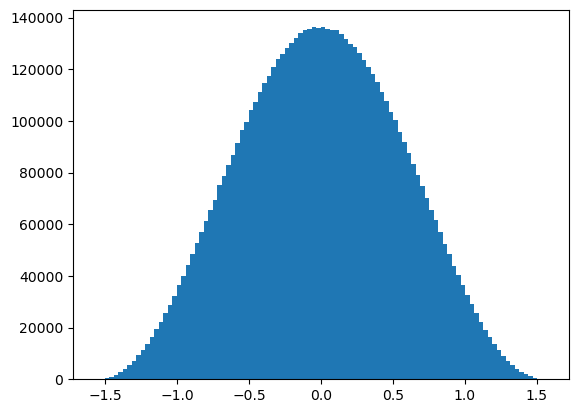

In [168]:
np.random.shuffle(theta_sample)
plt.hist(theta_sample[:int(gen_dist_x.shape[0])], bins=100)

In [213]:
def Energy_theta_func(C, enery, theta):
    U = 3.36 #binding
    m = 0.212
    Alpha = 0.14
    n = 0.5
    A = 13
    # m_t = 44.803928e-27
    # m_i = 66.335e-27
    m_t = 27
    m_i = 40
    q = 2 - m_t/(4*m_i)
    Q = 0.55
    E_inc = 600 # eVsb Vsb self bias
    if theta < np.pi/4 or theta >= -np.pi/4:
        return C * enery/(enery + U)**(3-2*m)*(1 - ((U + enery)/(U + Alpha*E_inc))**n)*np.exp(-A*((m_i/m_t)*((U + enery * np.cos(theta)**q)/E_inc))**Q)
    else:
        return C * enery/(enery + U)**(3-2*m)*(1 - ((U + enery)/(U + Alpha*E_inc))**n)*np.exp(-A*((m_i/m_t)*((U + enery * (1-np.sin(theta*2)/2)**q)/E_inc))**Q)

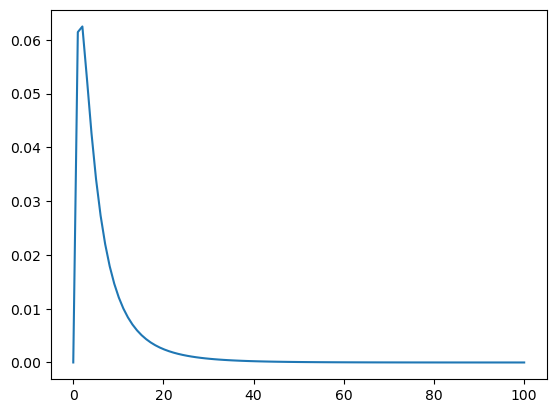

In [214]:
theta = 0.15*np.pi
enery = np.linspace(0, 100, 100)

fig, ax = plt.subplots(1,1)
ax.plot(enery, Energy_theta_func(10, enery, theta))
# ax.set_yscale('log')

In [215]:
Energy_theta_func(10, enery, theta)/np.sum(Energy_theta_func(10, enery, theta))

array([ 0.00000000e+00,  1.46722110e-01,  1.49223113e-01,  1.26067815e-01,
        1.01826479e-01,  8.14411968e-02,  6.52558814e-02,  5.26045203e-02,
        4.27241153e-02,  3.49693141e-02,  2.88382996e-02,  2.39517880e-02,
        2.00253181e-02,  1.68452868e-02,  1.42504384e-02,  1.21181493e-02,
        1.03544199e-02,  8.88659531e-03,  7.65805802e-03,  6.62433797e-03,
        5.75024086e-03,  5.00771224e-03,  4.37423614e-03,  3.83162500e-03,
        3.36509801e-03,  2.96257394e-03,  2.61412454e-03,  2.31154905e-03,
        2.04804089e-03,  1.81792483e-03,  1.61644844e-03,  1.43961575e-03,
        1.28405382e-03,  1.14690507e-03,  1.02574008e-03,  9.18486579e-04,
        8.23371303e-04,  7.38872306e-04,  6.63679566e-04,  5.96662385e-04,
        5.36842280e-04,  4.83370369e-04,  4.35508443e-04,  3.92613055e-04,
        3.54122131e-04,  3.19543637e-04,  2.88445984e-04,  2.60449863e-04,
        2.35221297e-04,  2.12465691e-04,  1.91922739e-04,  1.73362059e-04,
        1.56579419e-04,  

In [216]:
enery_bins = np.linspace(0, 50, 100)

energy_theta_tuple = []
for j in range(theta_hist_x.shape[0]):
    print(j)
    enery_sample = np.array([])
    for i in range(enery_bins.shape[0] - 1):
        enery_sample = np.concatenate(( enery_sample, \
                                    np.random.uniform(enery_bins[i], enery_bins[i+1], \
                                    int(Energy_theta_func(10, enery_bins[i], theta_hist_x[j])/np.sum(Energy_theta_func(10, enery_bins, theta_hist_x[j]))*1e6))))
    energy_theta_tuple.append(enery_sample)

for i in range(len(energy_theta_tuple)):
    np.random.shuffle(energy_theta_tuple[i])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98


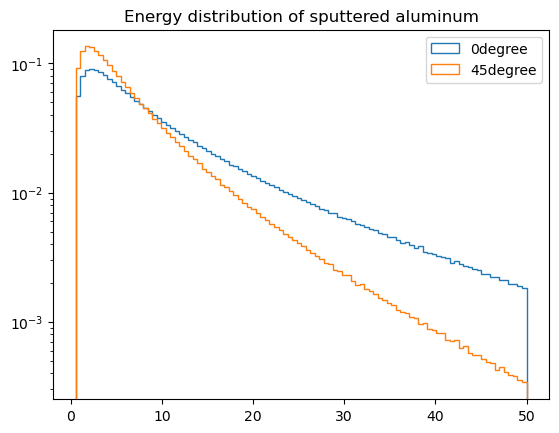

In [217]:
fig, ax = plt.subplots()
ax.set_title("Energy distribution of sputtered aluminum")
ax.hist(energy_theta_tuple[0],density=True, bins=100,histtype='step', stacked=True, fill=False, label='0degree')
ax.hist(energy_theta_tuple[25],density=True, bins=100,histtype='step', stacked=True, fill=False, label='45degree')
ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()

In [218]:
energy_theta_tuple[50].shape

(999876,)

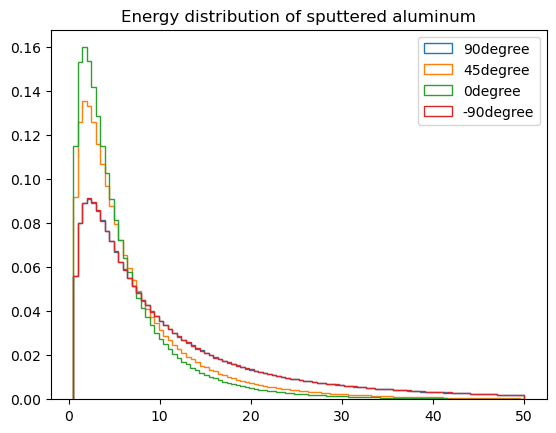

In [219]:
fig, ax = plt.subplots()
ax.set_title("Energy distribution of sputtered aluminum")
ax.hist(energy_theta_tuple[0],density=True, bins=100,histtype='step', stacked=True, fill=False, label='90degree')
ax.hist(energy_theta_tuple[25],density=True, bins=100,histtype='step', stacked=True, fill=False, label='45degree')
ax.hist(energy_theta_tuple[50],density=True, bins=100,histtype='step', stacked=True, fill=False, label='0degree')
ax.hist(energy_theta_tuple[98],density=True, bins=100,histtype='step', stacked=True, fill=False, label='-90degree')
# ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()

In [178]:
len(energy_theta_tuple)

99

In [179]:
test_sample = theta_sample[:int(gen_dist_x.shape[0])]
theta_hist_sample = np.histogram(test_sample, bins=99)

energy_sample = np.array([])
energymin = []
for i in range(99):
    energy_theta_sample = energy_theta_tuple[i][:theta_hist_sample[0][i] ]
    print(energy_theta_sample.shape)
    energy_sample = np.concatenate((energy_sample, energy_theta_sample))
    print(np.average(energy_theta_sample))
    energymin.append(np.average(energy_theta_sample))

print(energy_sample.shape)
print(gen_dist_x.shape[0])

(26,)
10.590011810323237
(197,)
10.28422894815816
(529,)
9.31993569795058
(1111,)
9.457712735134006
(1855,)
9.440771180583935
(2998,)
9.382752036258596
(4192,)
9.164190824565528
(5723,)
9.007655072031154
(7421,)
8.77604502738147
(9530,)
8.614923957160563
(11524,)
8.529600799566756
(14123,)
8.354467961782195
(16623,)
8.202016084175531
(20172,)
8.073175877894007
(22730,)
7.859323091625861
(26344,)
7.706785918835028
(29610,)
7.62564689237515
(33213,)
7.494515205547395
(37495,)
7.2231344992784425
(41522,)
7.158398634931011
(45365,)
7.004916329056117
(49922,)
6.824532214432439
(54182,)
6.76308422849015
(58529,)
6.629230019471389
(62843,)
6.512055383959589
(67549,)
6.458788941429735
(71485,)
6.303832741173316
(77139,)
6.248521374480683
(80751,)
6.175618886397339
(85124,)
6.070731660492759
(89091,)
5.983900796764634
(93991,)
5.969189038048413
(98457,)
5.880541042044721
(102118,)
5.809593669558233
(106299,)
5.751788869971508
(109892,)
5.705292893699518
(113774,)
5.623010053606268
(116597,)
5.5

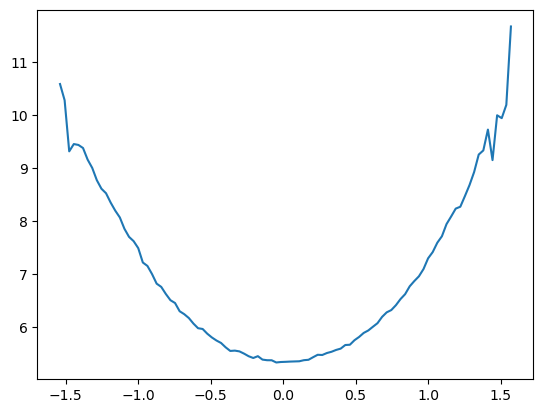

In [180]:
fig, ax = plt.subplots(1,1)
ax.plot(theta_bins[1:], energymin)

In [181]:
theta_hist_sample[0]

array([    26,    197,    529,   1111,   1855,   2998,   4192,   5723,
         7421,   9530,  11524,  14123,  16623,  20172,  22730,  26344,
        29610,  33213,  37495,  41522,  45365,  49922,  54182,  58529,
        62843,  67549,  71485,  77139,  80751,  85124,  89091,  93991,
        98457, 102118, 106299, 109892, 113774, 116597, 120176, 123290,
       125873, 128431, 130456, 132398, 134577, 135662, 136912, 137208,
       137257, 137607, 137354, 137196, 136891, 135628, 134275, 132038,
       130457, 128856, 125691, 123770, 119678, 117818, 113438, 109966,
       106155, 102525,  98185,  93783,  89892,  85342,  81193,  76398,
        72158,  67496,  63209,  58811,  54162,  49629,  45201,  41655,
        37724,  33530,  29894,  26385,  22963,  19741,  16921,  14147,
        11774,   9507,   7435,   5633,   4142,   2885,   1945,   1136,
          546,    197,     27], dtype=int64)

(6565275,)
(6565275,)


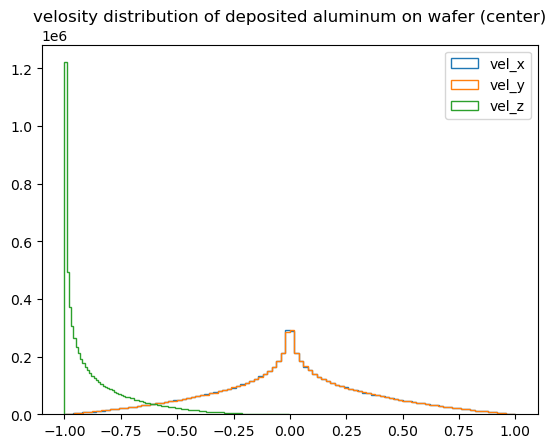

In [182]:
ev = 1.602176634e-19
velosity_norm_energy = np.sqrt((energy_sample*ev)*2/44.803928e-27)

test_sample_sort = np.sort(test_sample)

theta = test_sample
phi = np.random.rand(gen_dist_x.shape[0])*2*np.pi
print(phi.shape)
print(theta.shape)
# vel_x = np.cos(phi)*np.sin(theta)*velosity_norm_energy
# vel_y = np.sin(phi)*np.sin(theta)*velosity_norm_energy
random2 = np.random.rand(gen_dist_x.shape[0])
vel_x = np.sin(theta)*(np.cos(2*np.pi*random2))
vel_y = np.sin(theta)*(np.sin(2*np.pi*random2))

vel_z = np.cos(theta)

velosity_matrix = np.array([vel_x, vel_y, -vel_z]).T

rng = np.random.default_rng()
velosity_matrix = rng.permuted(velosity_matrix, axis=0)

fig, ax = plt.subplots()
ax.set_title("velosity distribution of deposited aluminum on wafer (center)")
ax.hist(velosity_matrix[:,0], bins=100,histtype='step', stacked=True, fill=False, label='vel_x')
ax.hist(velosity_matrix[:,1], bins=100,histtype='step', stacked=True, fill=False, label='vel_y')
ax.hist(velosity_matrix[:,2], bins=100,histtype='step', stacked=True, fill=False, label='vel_z')
# ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()

(6565275,)
(6565275,)


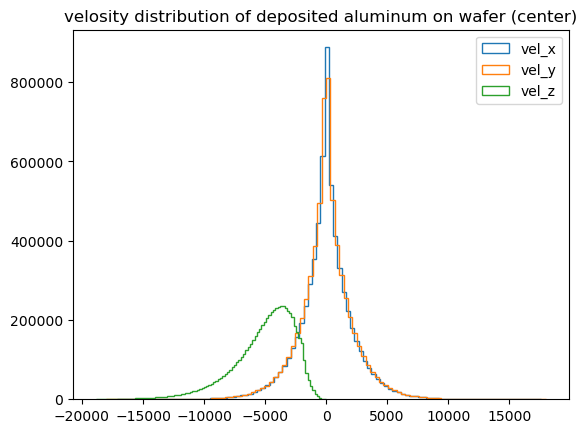

In [183]:
ev = 1.602176634e-19
velosity_norm_energy = np.sqrt((energy_sample*ev)*2/44.803928e-27)

test_sample_sort = np.sort(test_sample)

theta = test_sample
phi = np.random.rand(gen_dist_x.shape[0])*2*np.pi
print(phi.shape)
print(theta.shape)
# vel_x = np.cos(phi)*np.sin(theta)*velosity_norm_energy
# vel_y = np.sin(phi)*np.sin(theta)*velosity_norm_energy
random2 = np.random.rand(gen_dist_x.shape[0])
vel_x = np.sin(theta)*(np.cos(2*np.pi*random2))*velosity_norm_energy
vel_y = np.sin(theta)*(np.sin(2*np.pi*random2))*velosity_norm_energy

vel_z = np.cos(theta)*velosity_norm_energy

velosity_matrix = np.array([vel_x, vel_y, -vel_z]).T

rng = np.random.default_rng()
velosity_matrix = rng.permuted(velosity_matrix, axis=0)

fig, ax = plt.subplots()
ax.set_title("velosity distribution of deposited aluminum on wafer (center)")
ax.hist(velosity_matrix[:,0], bins=100,histtype='step', stacked=True, fill=False, label='vel_x')
ax.hist(velosity_matrix[:,1], bins=100,histtype='step', stacked=True, fill=False, label='vel_y')
ax.hist(velosity_matrix[:,2], bins=100,histtype='step', stacked=True, fill=False, label='vel_z')
# ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()

(6565275,)
(6565275,)


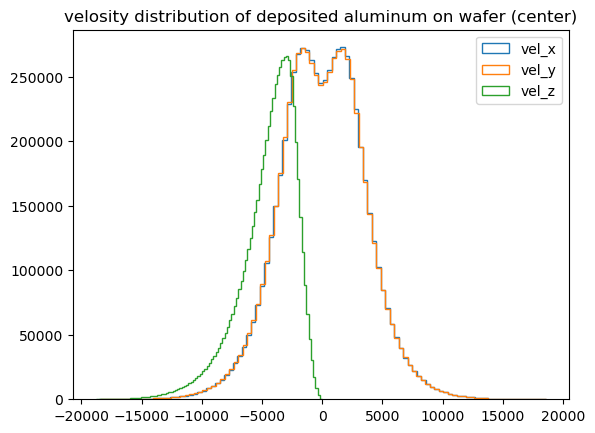

In [131]:
ev = 1.602176634e-19
velosity_norm_energy = np.sqrt((energy_sample*ev)*2/44.803928e-27)

test_sample_sort = np.sort(test_sample)

theta = test_sample
phi = np.random.rand(gen_dist_x.shape[0])*2*np.pi
print(phi.shape)
print(theta.shape)
# vel_x = np.cos(phi)*np.sin(theta)*velosity_norm_energy
# vel_y = np.sin(phi)*np.sin(theta)*velosity_norm_energy
random2 = np.random.rand(gen_dist_x.shape[0])
vel_x = np.sin(theta)*(np.cos(2*np.pi*random2))*velosity_norm_energy
vel_y = np.sin(theta)*(np.sin(2*np.pi*random2))*velosity_norm_energy

vel_z = np.cos(theta)*velosity_norm_energy

velosity_matrix = np.array([vel_x, vel_y, -vel_z]).T

rng = np.random.default_rng()
velosity_matrix = rng.permuted(velosity_matrix, axis=0)

fig, ax = plt.subplots()
ax.set_title("velosity distribution of deposited aluminum on wafer (center)")
ax.hist(velosity_matrix[:,0], bins=100,histtype='step', stacked=True, fill=False, label='vel_x')
ax.hist(velosity_matrix[:,1], bins=100,histtype='step', stacked=True, fill=False, label='vel_y')
ax.hist(velosity_matrix[:,2], bins=100,histtype='step', stacked=True, fill=False, label='vel_z')
# ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()

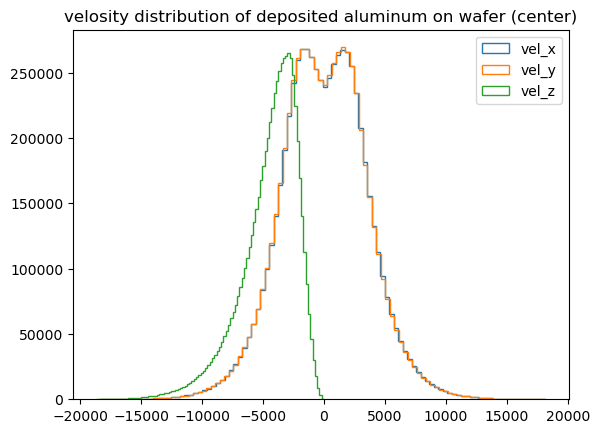

In [89]:
ev = 1.602176634e-19
velosity_norm_energy = np.sqrt((energy_sample*ev)*2/44.803928e-27)

test_sample_sort = np.sort(test_sample)

theta = test_sample
phi = np.random.rand(gen_dist_x.shape[0])*2*np.pi
# vel_x = np.cos(phi)*np.sin(theta)*velosity_norm_energy
# vel_y = np.sin(phi)*np.sin(theta)*velosity_norm_energy
random2 = np.random.rand(gen_dist_x.shape[0])
vel_x = np.sin(theta)*(np.cos(2*np.pi*random2))*velosity_norm_energy
vel_y = np.sin(theta)*(np.sin(2*np.pi*random2))*velosity_norm_energy

vel_z = np.cos(theta)*velosity_norm_energy

velosity_matrix = np.array([vel_x, vel_y, -vel_z]).T

rng = np.random.default_rng()
velosity_matrix = rng.permuted(velosity_matrix, axis=0)

fig, ax = plt.subplots()
ax.set_title("velosity distribution of deposited aluminum on wafer (center)")
ax.hist(velosity_matrix[:,0], bins=100,histtype='step', stacked=True, fill=False, label='vel_x')
ax.hist(velosity_matrix[:,1], bins=100,histtype='step', stacked=True, fill=False, label='vel_y')
ax.hist(velosity_matrix[:,2], bins=100,histtype='step', stacked=True, fill=False, label='vel_z')
# ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()

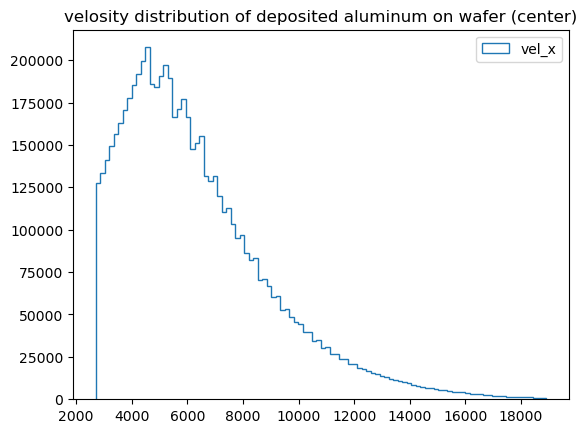

In [69]:
fig, ax = plt.subplots()
ax.set_title("velosity distribution of deposited aluminum on wafer (center)")
ax.hist(velosity_norm_energy, bins=100,histtype='step', stacked=True, fill=False, label='vel_x')

# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()

In [34]:
from scipy.stats import rv_continuous
from scipy.stats.sampling import NumericalInversePolynomial
from scipy.special import gamma, factorial

In [35]:
def diVr_func(d_refi, eVr, wi):
    kb = 1.380649e-23
    Tref = 650
    ev = 1.60217663e-19
    diVr = d_refi * np.sqrt(((kb*Tref)/(eVr*ev))**(wi-1/2)*gamma(5/2 - wi))
    return diVr

In [36]:
def DXsec(d_refi, eVr, wi, chi):
    if chi == 0:
        return 0
    if chi != 0:
        return diVr_func(d_refi, eVr, wi)**2/(np.pi * np.sin(chi))*(1 - chi/np.pi)

In [42]:
def TotXsec(d_refi, eVr, wi):
    return np.pi * diVr_func(d_refi, eVr, wi)**2

In [37]:
def DXsec(d_refi, eVr, wi, chi):
    return diVr_func(d_refi, eVr, wi)**2/(np.pi * np.sin(chi))*(1 - chi/np.pi)

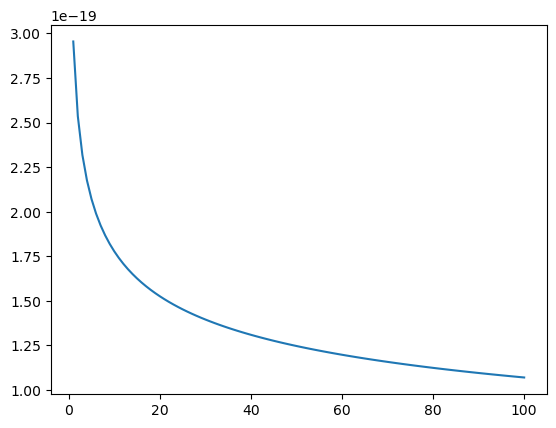

In [44]:
enery = np.linspace(1, 100, 100)

fig, ax = plt.subplots(1,1)
ax.plot(enery, TotXsec((4.614 + 4.151)/2*1e-10, enery, 0.721))

C:\Users\URCS049\AppData\Local\Temp\ipykernel_30344\2798262128.py:5: RuntimeWarning: divide by zero encountered in divide
  diVr = d_refi * np.sqrt(((kb*Tref)/(eVr*ev))**(wi-1/2)*gamma(5/2 - wi))


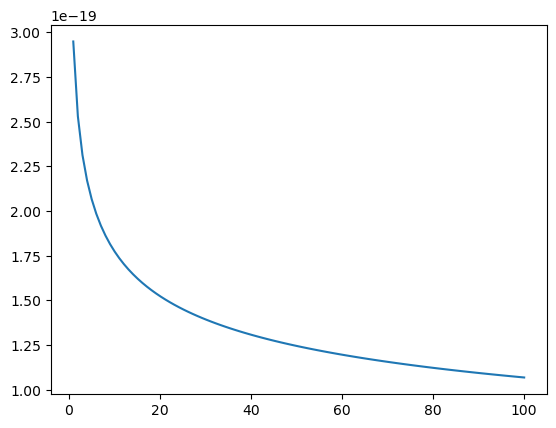

In [45]:
enery = np.linspace(0, 100, 100)

fig, ax = plt.subplots(1,1)
ax.plot(enery, TotXsec((4.614 + 4.151)/2*1e-10, enery, 0.721))

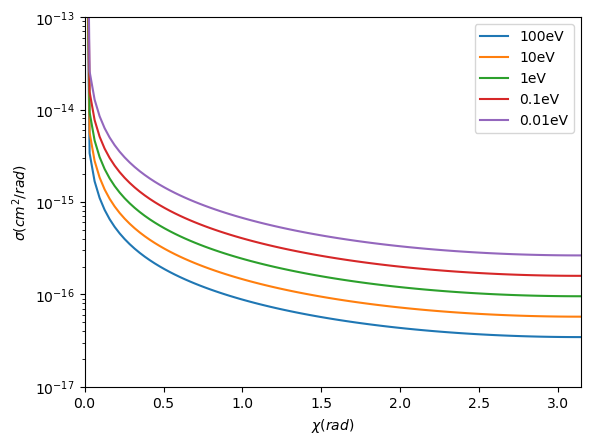

In [49]:
chiX = np.linspace(0.000001, np.pi*0.999999999, 100)

fig, ax = plt.subplots(1,1)
ax.plot(chiX, DXsec((4.614 + 4.151)/2*1e-8, 100, 0.721, chiX), label='100eV')
ax.plot(chiX, DXsec((4.614 + 4.151)/2*1e-8, 10, 0.721, chiX), label='10eV')
ax.plot(chiX, DXsec((4.614 + 4.151)/2*1e-8, 1, 0.721, chiX), label='1eV')
ax.plot(chiX, DXsec((4.614 + 4.151)/2*1e-8, 0.1, 0.721, chiX), label='0.1eV')
ax.plot(chiX, DXsec((4.614 + 4.151)/2*1e-8, 0.01, 0.721, chiX), label='0.01eV')
ax.set_xlabel('$\chi(rad)$')
ax.set_xlim(0, np.pi)
ax.set_ylim(1e-17, 1e-13)
ax.set_ylabel('$\sigma(cm^2 /rad)$')
ax.set_yscale('log')
ax.legend()

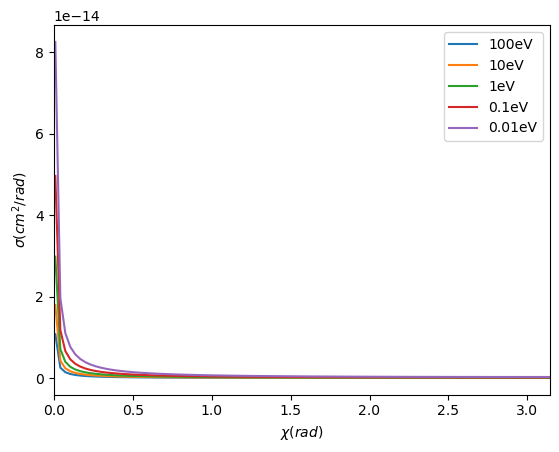

In [54]:
chiX = np.linspace(0.01, np.pi*0.999999999, 100)

fig, ax = plt.subplots(1,1)
ax.plot(chiX, DXsec((4.614 + 4.151)/2*1e-8, 100, 0.721, chiX), label='100eV')
ax.plot(chiX, DXsec((4.614 + 4.151)/2*1e-8, 10, 0.721, chiX), label='10eV')
ax.plot(chiX, DXsec((4.614 + 4.151)/2*1e-8, 1, 0.721, chiX), label='1eV')
ax.plot(chiX, DXsec((4.614 + 4.151)/2*1e-8, 0.1, 0.721, chiX), label='0.1eV')
ax.plot(chiX, DXsec((4.614 + 4.151)/2*1e-8, 0.01, 0.721, chiX), label='0.01eV')
ax.set_xlabel('$\chi(rad)$')
ax.set_xlim(0, np.pi)
# ax.set_ylim(1e-17, 1e-13)
ax.set_ylabel('$\sigma(cm^2 /rad)$')
# ax.set_yscale('log')
ax.legend()

In [62]:
DX100 = DXsec((4.614 + 4.151)/2*1e-8, 100, 0.721, chiX)

DX100_sample = np.array([])
for i in range(chiX.shape[0] - 1):
    DX100_sample = np.concatenate(( DX100_sample, np.random.uniform(chiX[i], chiX[i+1], int(DX100[i]/np.sum(DX100)*1e6))))


In [64]:
DX100_sample.sum()

373195.2647326207

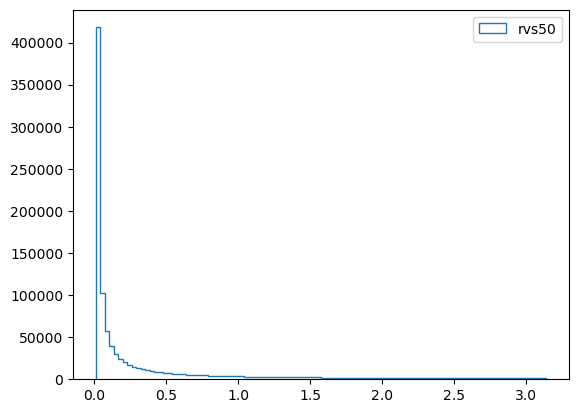

In [65]:
plt.hist(DX100_sample, bins= 100, histtype='step', stacked=True, fill=False, label='rvs50')
plt.legend()

In [76]:
energy = np.linspace(0.1, 50, 50)
chiX = np.linspace(0.01, np.pi*0.999999999, 100)

DX_tuple = []
for j in range(energy.shape[0]):
    print(j)
    DX_sample = np.array([])
    DX_sample = np.array([])
    for i in range(chiX.shape[0] - 1):
        DX_sample = np.concatenate(( DX_sample, \
                                    np.random.uniform(chiX[i], chiX[i+1], \
                                    int(DXsec((4.614 + 4.151)/2*1e-8, energy[j], 0.721, chiX[i])*1e19))))
    DX_tuple.append(DX_sample)

for i in range(len(DX_tuple)):
    np.random.shuffle(DX_tuple[i])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


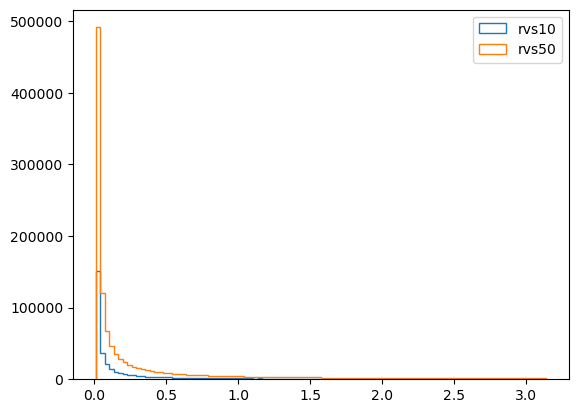

In [77]:
plt.hist(DX_tuple[20], bins= 100, histtype='step', stacked=True, fill=False, label='rvs10')
plt.hist(DX_tuple[0], bins= 100, histtype='step', stacked=True, fill=False, label='rvs50')
plt.legend()

C:\Users\URCS049\AppData\Local\Temp\ipykernel_30344\219662207.py:15: RuntimeWarning: [objid: PINV.011] 102 : center moved into domain of distribution => 
  rng50 = NumericalInversePolynomial(dist50, domain=[0.01, np.pi], random_state=urng)
C:\Users\URCS049\AppData\Local\Temp\ipykernel_30344\219662207.py:19: RuntimeWarning: [objid: PINV.012] 102 : center moved into domain of distribution => 
  rng100 = NumericalInversePolynomial(dist100, domain=[0.01, np.pi], random_state=urng)


[0.15421283 0.01142681 0.14662062 ... 0.22699611 0.04719803 0.02763271]


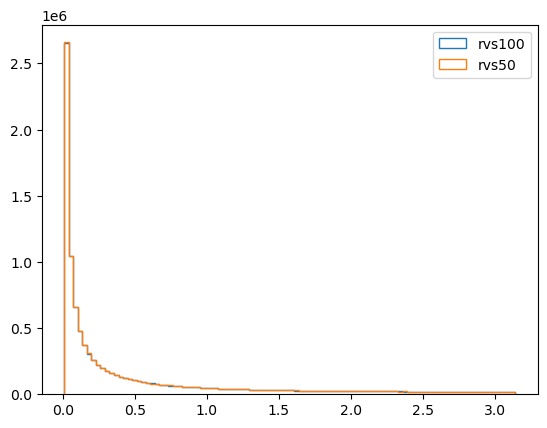

In [78]:
class DCS_gen_50(rv_continuous):
    "Dcs distribution"
    def _pdf(self, x):
       return DXsec((4.614 + 4.151)/2*1e-10, 0.01, 0.7205, x)
    

class DCS_gen_100(rv_continuous):
    "Dcs distribution"
    def _pdf(self, x):
       return DXsec((4.614 + 4.151)/2*1e-10, 1000, 0.7205, x)
    
urng = np.random.default_rng()

dist50 =DCS_gen_50()
rng50 = NumericalInversePolynomial(dist50, domain=[0.01, np.pi], random_state=urng)
rvs50 = rng50.rvs(size=10000000)

dist100 =DCS_gen_100()
rng100 = NumericalInversePolynomial(dist100, domain=[0.01, np.pi], random_state=urng)
rvs100 = rng100.rvs(size=10000000)
print(rvs100)
plt.hist(rvs100, bins= 100, histtype='step', stacked=True, fill=False, label='rvs100')
plt.hist(rvs50, bins= 100, histtype='step', stacked=True, fill=False, label='rvs50')
plt.legend()

In [130]:
print(rvs50.shape)

(10000000,)


In [23]:
transport = CollisionModule.transport(pressure_pa=0.3, timeStep= 1e-9, temperature=300, cellSize=[240, 240, 150], celllength=2, chamberSize=[0.24, 0.24], DXsec=rvs50)

In [24]:
release_pos = np.array([gen_dist_x, gen_dist_y, np.zeros_like(gen_dist_x)]).T

print(release_pos.shape)
print(velosity_matrix.shape)

(6565275, 3)
(6565275, 3)


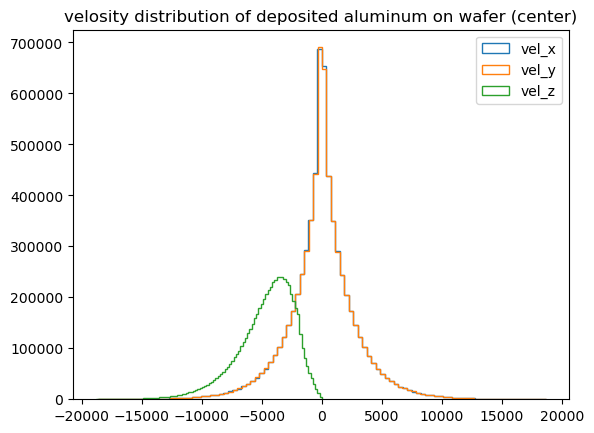

In [37]:
fig, ax = plt.subplots()
ax.set_title("velosity distribution of deposited aluminum on wafer (center)")
ax.hist(velosity_matrix[:,0], bins=100,histtype='step', stacked=True, fill=False, label='vel_x')
ax.hist(velosity_matrix[:,1], bins=100,histtype='step', stacked=True, fill=False, label='vel_y')
ax.hist(velosity_matrix[:,2], bins=100,histtype='step', stacked=True, fill=False, label='vel_z')
# ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()

In [41]:
np.save('DXsec_Al_1e8_0618', rvs100)

In [23]:
np.save('release_pos_1e8',release_pos)
np.save('velosity_matrix_1e8', velosity_matrix)
np.save('DXsec_Al_1e8', rvs50)

In [33]:
transport.runE(p0=release_pos, v0=velosity_matrix, time=1e-7)

running:   0%|                                                            | 0.00/100 [00:00<?, ?B/s]


(array([], dtype=float64), array([[0, 0, 0]]))